In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear kernel SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
print("Linear SVM Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))

# RBF kernel SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
print("RBF Kernel SVM Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))

Linear SVM Accuracy: 0.956140350877193
RBF Kernel SVM Accuracy: 0.9736842105263158


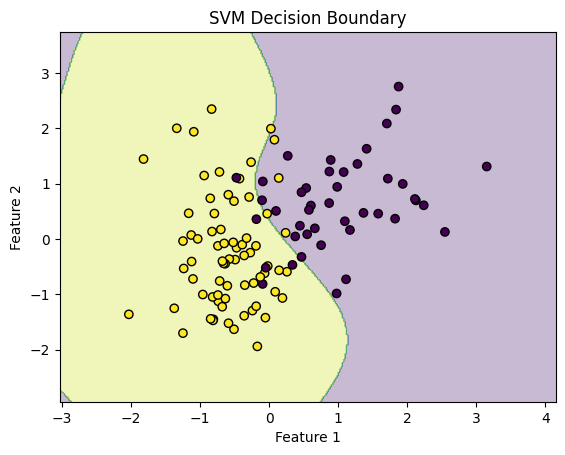

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Use only the first 2 features for visualization
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

model_2d = SVC(kernel='rbf', C=1, gamma='scale')
model_2d.fit(X_train_vis, y_train_vis)

def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(model_2d, X_test_vis, y_test_vis)

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Score:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Score: 0.9736263736263737


In [5]:
from sklearn.model_selection import cross_val_score

best_model = grid.best_estimator_
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean accuracy: 0.9736376339077782


In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set using best model
y_pred = best_model.predict(X_test)

# Show evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

